Спортивные услуги. Запись клиента на занятие. Лебедева Анна, группа М8О-110Б-19

In [2]:
import functools
import datetime

In [3]:
#Основной класс
class StudioStretching:
    "Студия растяжки"
    
    def __init__(self, name, address):
        self.name = name #название
        self.address = address #адрес
        self.workouts = {} #занятия
        self.managers = [] #менеджеры
        self.instructors = [] #тренеры
        self.customers = [] #клиенты
        self.fund = 0 #капитал
        
    def register(self, date, customer, workout, manager, instructor, time):
        """Запись на занятие"""
        for workout, amount in workout.items():
            if workout not in self.workouts.keys():
                print('Запись не возможна на {}'.format(workout))
                continue
            summa = self.pricelist[workout]*amount
            Registration(date, workout, customer, manager, amount, summa).save()
            self.fund += summa
            print("Клиент {} записан(а) на занятие {} в {}, тренер {}".format(customer, workout, time, instructor))
            manager.register(date, workout, amount,  summa)
            customer.signed(date, workout, amount, summa)

        
    def add_manager(self, manager):
        """ Добавление менеджера """
        self.managers.append(manager)
    
    def add_customer(self, customer):
        """ Добавление клиента """
        self.customers.append(customer)
        
    def add_instructor(self, instructor):
        """ Добавление инструктора """
        self.instructors.append(instructor)
        
    def schedule(self, workouts, time):
        """ Расписание """
        time = 16
        for workout in workouts:
            workouts = {}.fromkeys(workouts)
            self.workouts[workout] = str(time)+':00'
            time+=1
            
    def instructor_workout(self, instructor, workouts):
        """ Закрепление тренировки за инструктором """
        for workout in workouts:
            workouts = {}.fromkeys(workouts)
            self.workouts[workout] = instructor
        
    def __repr__(self):
        return self.name
    
    def set_fund(self, fund):
        self.fund = fund

    def get_fund(self):
        return self.fund
    
    def set_pricelist(self, pricelist):
        self.pricelist = pricelist
        
    
class Customer:
    """ Клиент в студии """
    items = []
    def __init__(self, name):
        self.name = name
        type(self).items.append(self)
        
    def __repr__(self):
        return self.name
    
    def signed(self, date, workout, amount, summa):
        with open("customers.txt", 'a+', encoding = 'utf-8') as file:
            file.write("{:%Y-%m-%d} {} {} {} {}\n".format(date, 
                                                          Customer.items.index(self),
                                                          Workout.items.index(workout), amount,
                                                          summa
                                                         )
                      )
    
class Manager:
    """ Менеджер студии, который записывает клиента на тренировку """
    items = []
    def __init__(self, name):
        self.name = name
        type(self).items.append(self)
        
    def register(self, date, workout, amount,  summa):
        with open('managers.txt', 'a+', encoding='utf-8') as file:
            file.write("{:%Y-%m-%d} {} {} {} {}\n".format(date,
                                                          Manager.items.index(self),
                                                          Workout.items.index(workout), amount,
                                                          summa
                                                         )
                      )
    
    def __repr__(self):
        return self.name
    
class Instructor:
    """Тренер"""
    items = []
    def __init__(self, name):
        self.name = name
        type(self).items.append(self)
    
    def __repr__(self):
        return self.name
    
class Registration:
    """Запись на занятие"""
    def __init__(self, date, workout, customer, manager, amount, summa):        
        self.date = date
        self.workout = workout
        self.customer = customer
        self.manager = manager
        self.amount = amount
        self.summa = summa
        
    def save(self):
        with open('registration.txt', 'a+', encoding='utf-8') as file:
            file.write("{:%Y-%m-%d} {} {} {} {} {}\n".format(self.date, 
                                                          Workout.items.index(self.workout), 
                                                          Customer.items.index(self.customer),
                                                          Manager.items.index(self.manager), self.amount,
                                                          self.summa
                                                         )
                      )
    
class Workout:
    """Тренировки """
    
    items = []
    def __init__(self, name):
        self.name = name
        type(self).items.append(self)
    
    def __repr__(self):
        return self.name


In [4]:
#Создаём студию
studiostretching = StudioStretching(name = "TopStretching", address = "ул. Фестивальная, дом 33")

In [5]:
#Добавляем менеджеров
soldatova = Manager('Александра Солдатова')
selezneva = Manager('Екатерина Селезнёва')
for manager in [soldatova, selezneva]:
    studiostretching.add_manager(manager)
studiostretching.managers

[Александра Солдатова, Екатерина Селезнёва]

In [6]:
#Добавляем инструкторов
kanyuk = Instructor('Анна Канюк')
lazarova = Instructor('Аделина Лазарова')
milanich = Instructor('Милена Миланич')
for instructor in [kanyuk, lazarova, milanich]:
    studiostretching.add_instructor(instructor)
studiostretching.instructors

[Анна Канюк, Аделина Лазарова, Милена Миланич]

In [7]:
#Добавляем тренировки в расписание
stretching = Workout("Растяжка")
yoga = Workout("Йога")
pilates = Workout("Пилатес")
fly_yoga = Workout("Йога в гамаках")
trx = Workout("TRX петли")
function = Workout("Функциональная тренировка")
studiostretching.schedule([stretching, yoga, pilates, fly_yoga, trx, function], 0)
studiostretching.workouts

{Растяжка: '16:00',
 Йога: '17:00',
 Пилатес: '18:00',
 Йога в гамаках: '19:00',
 TRX петли: '20:00',
 Функциональная тренировка: '21:00'}

In [8]:
#Закрепляем за тренером направления, которые он преподаёт
studiostretching.instructor_workout(kanyuk, [stretching, fly_yoga])
studiostretching.instructor_workout(lazarova, [yoga, trx])
studiostretching.instructor_workout(milanich, [pilates, function])
studiostretching.workouts

{Растяжка: Анна Канюк,
 Йога: Аделина Лазарова,
 Пилатес: Милена Миланич,
 Йога в гамаках: Анна Канюк,
 TRX петли: Аделина Лазарова,
 Функциональная тренировка: Милена Миланич}

In [9]:
#Добавляем клентов
mamun = Customer('Мамун М.')
kudryavtseva= Customer('Кудрявцева Я.')
medvedeva = Customer('Медведева С.')
lebedeva = Customer('Лебедева А.')
kislyakov = Customer('Кисляков А.')
lihachev = Customer ('Лихачёв А.')
for customer in [mamun, kudryavtseva, medvedeva, lebedeva, kislyakov, lihachev]:
    studiostretching.add_customer(customer)
studiostretching.customers   

[Мамун М., Кудрявцева Я., Медведева С., Лебедева А., Кисляков А., Лихачёв А.]

In [10]:
#Зададим капитал
studiostretching.set_fund(50000)

In [11]:
#Создадим прайс-лист
studiostretching.set_pricelist({trx: 500, stretching: 300, pilates: 350, function: 400, yoga: 350, fly_yoga: 500})

In [12]:
#Запишем первых клиентов
studiostretching.register(date = datetime.date(2020, 5, 6), 
                customer = medvedeva, 
                workout = {trx: 3}, 
                manager = soldatova, instructor = lazarova, time = '20:00')

Клиент Медведева С. записан(а) на занятие TRX петли в 20:00, тренер Аделина Лазарова


In [13]:
studiostretching.register(date = datetime.date(2020, 5, 6), 
                customer = mamun, 
                workout = {stretching: 6}, 
                manager = soldatova, instructor = kanyuk, time = '16:00')

Клиент Мамун М. записан(а) на занятие Растяжка в 16:00, тренер Анна Канюк


In [14]:
studiostretching.register(date = datetime.date(2020, 6, 6), 
                customer = kudryavtseva, 
                workout = {yoga: 4}, 
                manager = soldatova, instructor = lazarova, time = '17:00')

Клиент Кудрявцева Я. записан(а) на занятие Йога в 17:00, тренер Аделина Лазарова


In [15]:
studiostretching.register(date = datetime.date(2020, 6, 6), 
                customer = lebedeva, 
                workout = {trx: 8}, 
                manager = selezneva, instructor = lazarova, time = '20:00')

Клиент Лебедева А. записан(а) на занятие TRX петли в 20:00, тренер Аделина Лазарова


In [16]:
studiostretching.register(date = datetime.date(2020, 7, 6), 
                customer = medvedeva, 
                workout = {fly_yoga: 7}, 
                manager = selezneva, instructor = kanyuk, time = '19:00')

Клиент Медведева С. записан(а) на занятие Йога в гамаках в 19:00, тренер Анна Канюк


In [17]:
studiostretching.register(date = datetime.date(2020, 7, 6), 
                customer = mamun, 
                workout = {pilates: 2}, 
                manager = selezneva, instructor = milanich, time = '18:00')

Клиент Мамун М. записан(а) на занятие Пилатес в 18:00, тренер Милена Миланич


In [18]:
studiostretching.register(date = datetime.date(2020, 8, 6), 
                customer = kudryavtseva, 
                workout = {function: 5}, 
                manager = soldatova, instructor = milanich, time = '21:00')

Клиент Кудрявцева Я. записан(а) на занятие Функциональная тренировка в 21:00, тренер Милена Миланич


In [19]:
studiostretching.register(date = datetime.date(2020, 8, 6), 
                customer = lihachev, 
                workout = {trx: 2}, 
                manager = soldatova, instructor = lazarova, time = '20:00')

Клиент Лихачёв А. записан(а) на занятие TRX петли в 20:00, тренер Аделина Лазарова


In [20]:
studiostretching.register(date = datetime.date(2020, 8, 6), 
                customer = kudryavtseva, 
                workout = {function: 10}, 
                manager = soldatova, instructor = milanich, time = '21:00')

Клиент Кудрявцева Я. записан(а) на занятие Функциональная тренировка в 21:00, тренер Милена Миланич


In [21]:
#Проверим капитал
studiostretching.get_fund()

69900

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [83]:
#посмотрим заинтересованность клиентов
df = pd.read_csv('customers.txt', sep=' ', header = None)
df.columns = ["date", 'customer_id', 'workout_id', 'amount',  'summa']

In [84]:
df

,date,customer_id,workout_id,amount,summa
0,2020-05-06,2,4,3,1500
1,2020-05-06,0,0,6,1800
2,2020-06-06,1,1,4,1400
3,2020-06-06,3,4,8,4000
4,2020-07-06,2,3,7,3500
5,2020-07-06,0,2,2,700
6,2020-08-06,1,5,5,2000
7,2020-08-06,5,4,2,1000
8,2020-08-06,1,5,10,4000


In [85]:
data = df.groupby('customer_id').sum()

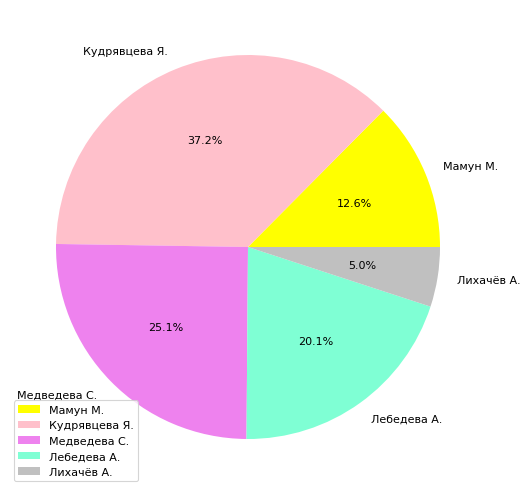

In [87]:
plt.figure(figsize=(10, 6), dpi=80)
plt.axes([0,0,1,1], aspect = 'equal')
Z = data['summa']
plt.pie(Z, autopct = '%1.1f%%', colors=["yellow", "pink", "violet", "aquamarine", "silver", "salmon"],
        labels = list(map(lambda i: Customer.items[i], data.index)))
plt.legend(loc='lower left')
plt.show()

In [67]:
#Посмотрим популярность направлений
data = df.groupby('workout_id').sum()

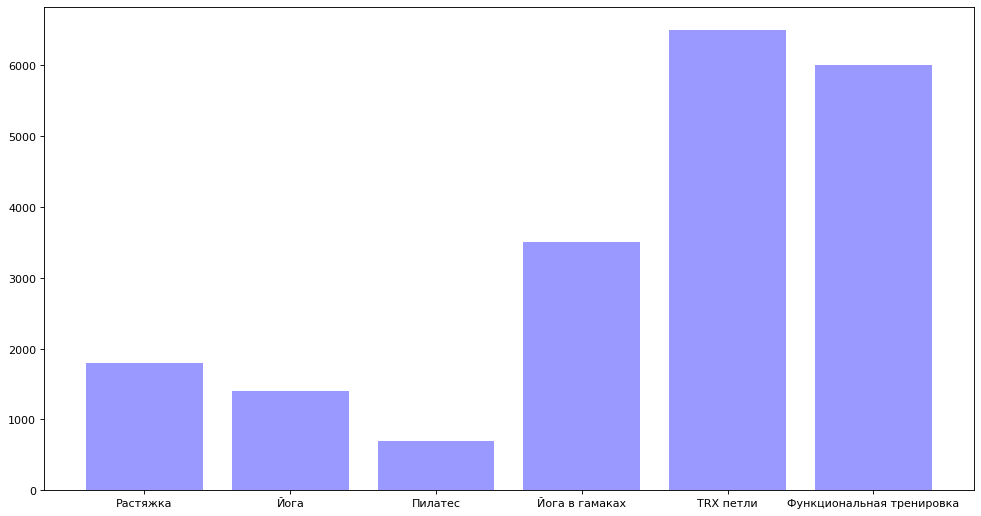

In [68]:
plt.figure(figsize=(15, 8), dpi=80)
X = np.arange(len(data))
Y1 = data['summa']
plt.bar(X, Y1, facecolor='#9999ff', tick_label = [stretching, yoga, pilates, fly_yoga, trx, function])


plt.show()

Самые популярные направления - тренирвки с петлями TRX и функциональные тренировки на активное жиросжигание

In [69]:
df = pd.read_csv('managers.txt', sep=' ', header = None)
df.columns = ["date", 'manager_id', 'workout_id', 'amount', 'summa']
df

,date,manager_id,workout_id,amount,summa
0,2020-05-06,0,4,3,1500
1,2020-05-06,0,0,6,1800
2,2020-06-06,0,1,4,1400
3,2020-06-06,1,4,8,4000
4,2020-07-06,1,3,7,3500
5,2020-07-06,1,2,2,700
6,2020-08-06,0,5,5,2000
7,2020-08-06,0,4,2,1000
8,2020-08-06,0,5,10,4000


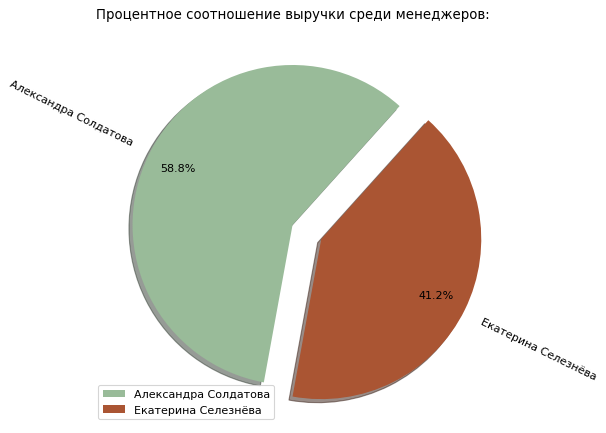

In [70]:
data = df.groupby('manager_id').sum()
plt.figure(figsize=(18,5), dpi=80)
Z = data['summa']
plt.axes([0,0,1,1], aspect = 'equal')
plt.pie(Z, explode=[0,.2], labels = list(map(lambda i: Manager.items[i], data.index)), 
        colors=['#99BB99','#AA5533'], 
        autopct='%1.1f%%', 
        pctdistance=0.8, 
        shadow=True,  
        startangle=48,  
        counterclock=True, 
        rotatelabels=True)
plt.legend(loc='lower left')
plt.title('Процентное соотношение выручки среди менеджеров:')
plt.show()

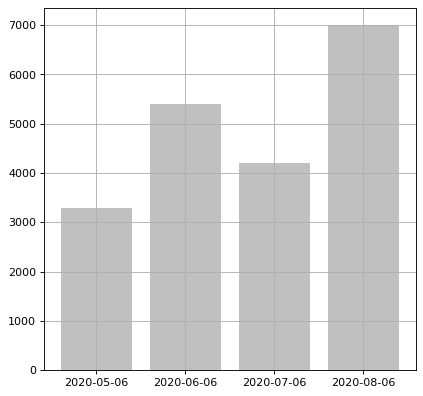

In [77]:
#Структура выручки по дням
data = df.groupby('date').sum()
plt.figure(figsize=(6, 6), dpi=80)
X = np.arange(len(data))
Y = data['summa']
plt.bar(X, Y, facecolor='silver', tick_label = data.index)
plt.grid(True)
plt.show()